In [129]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from keras.optimizers import Adam
from keras.models import Model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.applications.vgg16 import VGG16

In [130]:
# help(VGG16)

In [131]:
vgg16 = VGG16(weights='imagenet',include_top=False,
              input_shape=(32, 32, 3))
# VGG16 模型在include_top=False时，可以自定义输入大小，至少32x32，通道必须是3

mylayer = vgg16.output
mylayer = Flatten()(mylayer)
mylayer = Dense(128, activation='relu')(mylayer)
mylayer = Dropout(0.3)(mylayer)
mylayer = Dense(10, activation='softmax')(mylayer)

model = Model(inputs=vgg16.inputs, outputs=mylayer)

for layer in vgg16.layers:
    layer.trainable = False

In [132]:
train = pd.read_csv('train.csv')
y_train_full = train['label']
X_train_full = train.drop(['label'], axis=1)
X_test_full = pd.read_csv('test.csv')

In [133]:
X_train_full.shape

(42000, 784)

In [134]:
def process(data):
    data = np.array(data).reshape(-1,28,28)
    output = np.zeros((data.shape[0], 32, 32, 3))
    for i in range(data.shape[0]):
        img = data[i]
        rgb_array = np.zeros((img.shape[0], img.shape[1], 3), "uint8")
        rgb_array[:, :, 0], rgb_array[:, :, 1], rgb_array[:, :, 2] = img, img, img
        pic = cv2.resize(rgb_array, (32, 32), interpolation=cv2.INTER_LINEAR)
        output[i] = pic
#         if i == 0:
#             plt.imshow(pic)
    output = output.astype('float32')/255.0
    return output

In [135]:
y_train = np_utils.to_categorical(y_train_full, 10)
X_train = process(X_train_full)
X_test = process(X_test_full)

print(X_train.shape)
print(X_test.shape)

(42000, 32, 32, 3)
(28000, 32, 32, 3)


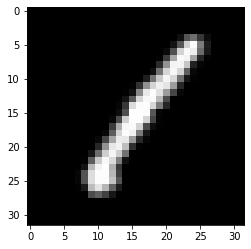

In [136]:
img = X_train[0]
plt.imshow(img)
np.set_printoptions(threshold=np.inf)# 全部显示矩阵
# print(X_train[0])

In [137]:
opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss="categorical_crossentropy",
              optimizer=opt, metrics=["accuracy"])

Epoch 1/50
263/263 [==============================] - 101s 384ms/step - loss: 0.9543 - accuracy: 0.7212 - val_loss: 0.5429 - val_accuracy: 0.8601
Epoch 2/50
263/263 [==============================] - 102s 387ms/step - loss: 0.5511 - accuracy: 0.8401 - val_loss: 0.4188 - val_accuracy: 0.8883
Epoch 3/50
263/263 [==============================] - 106s 402ms/step - loss: 0.4635 - accuracy: 0.8690 - val_loss: 0.3680 - val_accuracy: 0.9026
Epoch 4/50
263/263 [==============================] - 107s 405ms/step - loss: 0.4193 - accuracy: 0.8813 - val_loss: 0.3396 - val_accuracy: 0.9092
Epoch 5/50
263/263 [==============================] - 108s 411ms/step - loss: 0.3911 - accuracy: 0.8883 - val_loss: 0.3192 - val_accuracy: 0.9152
Epoch 6/50
263/263 [==============================] - 108s 410ms/step - loss: 0.3736 - accuracy: 0.8931 - val_loss: 0.3045 - val_accuracy: 0.9185
Epoch 7/50
263/263 [==============================] - 108s 412ms/step - loss: 0.3582 - accuracy: 0.8971 - val_loss: 0.2924 -

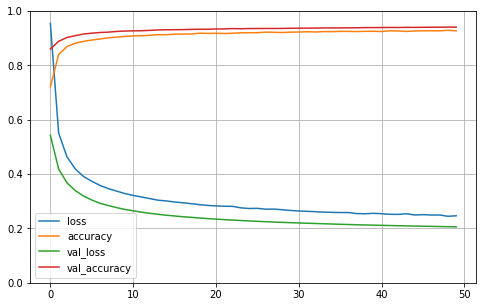

In [138]:
history = model.fit(X_train, y_train, epochs=50, batch_size=128,
                    validation_split=0.2)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [139]:
model.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)       

In [140]:
from keras.utils import plot_model
plot_model(model, './model.png', show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


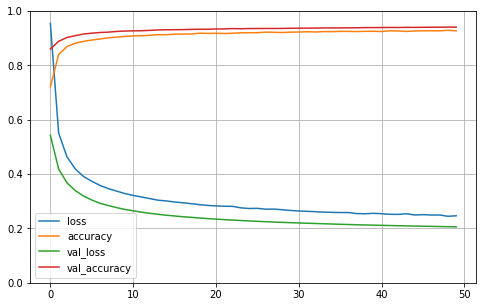

In [141]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [142]:
y_pred = model.predict(X_test)
pred = y_pred.argmax(axis=1).reshape(-1)
print(pred.shape)
print(pred)

(28000,)
[2 0 9 5 3 7 0 3 0 3 5 7 2 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 4 7 7 5 4 2 6 2 5
 5 1 6 7 7 4 9 8 7 8 3 6 4 6 8 8 3 8 2 1 2 2 0 4 1 7 0 0 0 1 9 0 1 6 5 8 8
 2 2 9 9 2 3 5 4 1 0 9 2 4 3 6 7 2 0 6 6 7 4 3 9 7 4 0 9 2 0 7 3 0 5 0 2 0
 0 4 7 1 7 1 1 3 3 3 7 2 4 6 3 8 7 7 4 3 5 6 0 0 0 3 1 3 6 2 3 4 5 5 8 7 7
 2 9 4 3 5 6 5 3 7 5 7 8 3 0 4 5 1 3 7 6 3 0 8 7 8 6 1 3 7 4 1 2 4 8 5 2 4
 9 2 1 6 0 6 1 4 9 6 0 9 7 5 9 1 9 0 9 9 0 8 4 6 2 0 9 3 6 7 2 1 6 3 4 2 3
 1 2 2 0 4 6 1 0 0 4 9 1 7 3 2 3 8 6 8 6 2 8 5 5 4 8 3 5 9 7 1 3 8 4 2 1 4
 3 6 3 3 5 7 0 6 8 3 1 6 0 6 3 9 3 1 5 8 4 0 9 2 0 5 3 7 1 9 9 2 7 7 9 9 6
 3 0 3 3 6 9 8 2 6 3 7 1 4 5 8 5 9 0 0 3 8 4 1 8 4 1 1 9 8 4 3 1 5 3 6 3 1
 3 0 9 0 0 6 0 6 5 1 8 6 0 6 5 3 2 6 7 7 2 3 8 3 9 8 7 8 6 3 8 4 2 3 8 1 6
 4 8 7 9 7 6 9 5 3 7 6 5 5 4 3 6 7 1 3 7 1 7 9 9 6 1 1 1 7 3 9 7 6 1 1 1 9
 3 5 5 5 0 4 1 2 3 1 1 3 5 9 6 6 5 5 1 4 7 4 7 4 8 5 2 0 1 3 9 5 0 8 4 7 4
 4 4 1 5 3 9 9 7 6 9 5 9 2 3 2 6 1 7 5 0 5 1 7 4 4 1 1 4 9 5 6 0 1 3 1 0 4
 8 1 5 7 9 4 9 3

In [143]:

image_id = pd.Series(range(1,len(pred)+1))
output = pd.DataFrame({'ImageId':image_id, 'Label':pred})
output.to_csv("submission_NN.csv",  index=False)